# Plot parameters obtained in CIGALE in the trained SOM

## Define the directory
Define the directory were all the files are saved.

In [13]:
observatory = '/data/mfonseca/'
my_computer = '/home/polaris/Lab_Astro/data/'

directory = my_computer

## Import the libraries

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
import pandas as pd

# SimpSOM, https://simpsom.readthedocs.io
import simpsom as sps

# Astropy
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

# CuPY
# import cupy as cp

# Seaborn
import seaborn as sns

## Trained SOM

Import original and whitened data used to train the SOM

In [15]:
data_path = '/home/polaris/Lab_Astro/data/soms/maps1/EMU_0102-32_DESY6GOLD_VIKINGDR5_CATWISE_noMag_original.csv'
data = pd.read_csv(data_path, sep=',', header=0, index_col=0)

data_white_path = '/home/polaris/Lab_Astro/data/soms/maps1/EMU_0102-32_DESY6GOLD_VIKINGDR5_CATWISE_noMag_zcaWhite.csv'
data_white = pd.read_csv(data_white_path, sep=',', header=0, index_col=0)

data_white_without_id = data_white.drop(columns=['id'])

Import the trained SOM

In [16]:
best_som_epoch = 40
file_trained_som = directory + 'soms/maps3/epoch_files/trained_som_' + str(best_som_epoch) + 'epoch'+ '.npy'

2025-05-20 16:37:00.732 | INFO     | simpsom.network:__init__:120 - Hexagonal topology.
2025-05-20 16:37:00.735 | INFO     | simpsom.network:_set_weights:201 - The weights will be loaded from file.
The map shape will be overwritten and no weightsinitialization will be applied.
/home/polaris/miniconda3/envs/labastro/lib/python3.10/site-packages/simpsom-3.0.0b0-py3.10.egg/simpsom/distances.py:178: RuntimeWarning: invalid value encountered in sqrt
  return self.xp.sqrt(squares_a + squares_b.T - 2 * a.dot(b.T))
2025-05-20 16:37:00.785 | INFO     | simpsom.network:get_nodes_difference:697 - Weights difference among neighboring nodes calculated.


/home/polaris/miniconda3/envs/labastro/lib/python3.10/site-packages/simpsom-3.0.0b0-py3.10.egg/simpsom/plots.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{t:.3f}' for t in ticks])


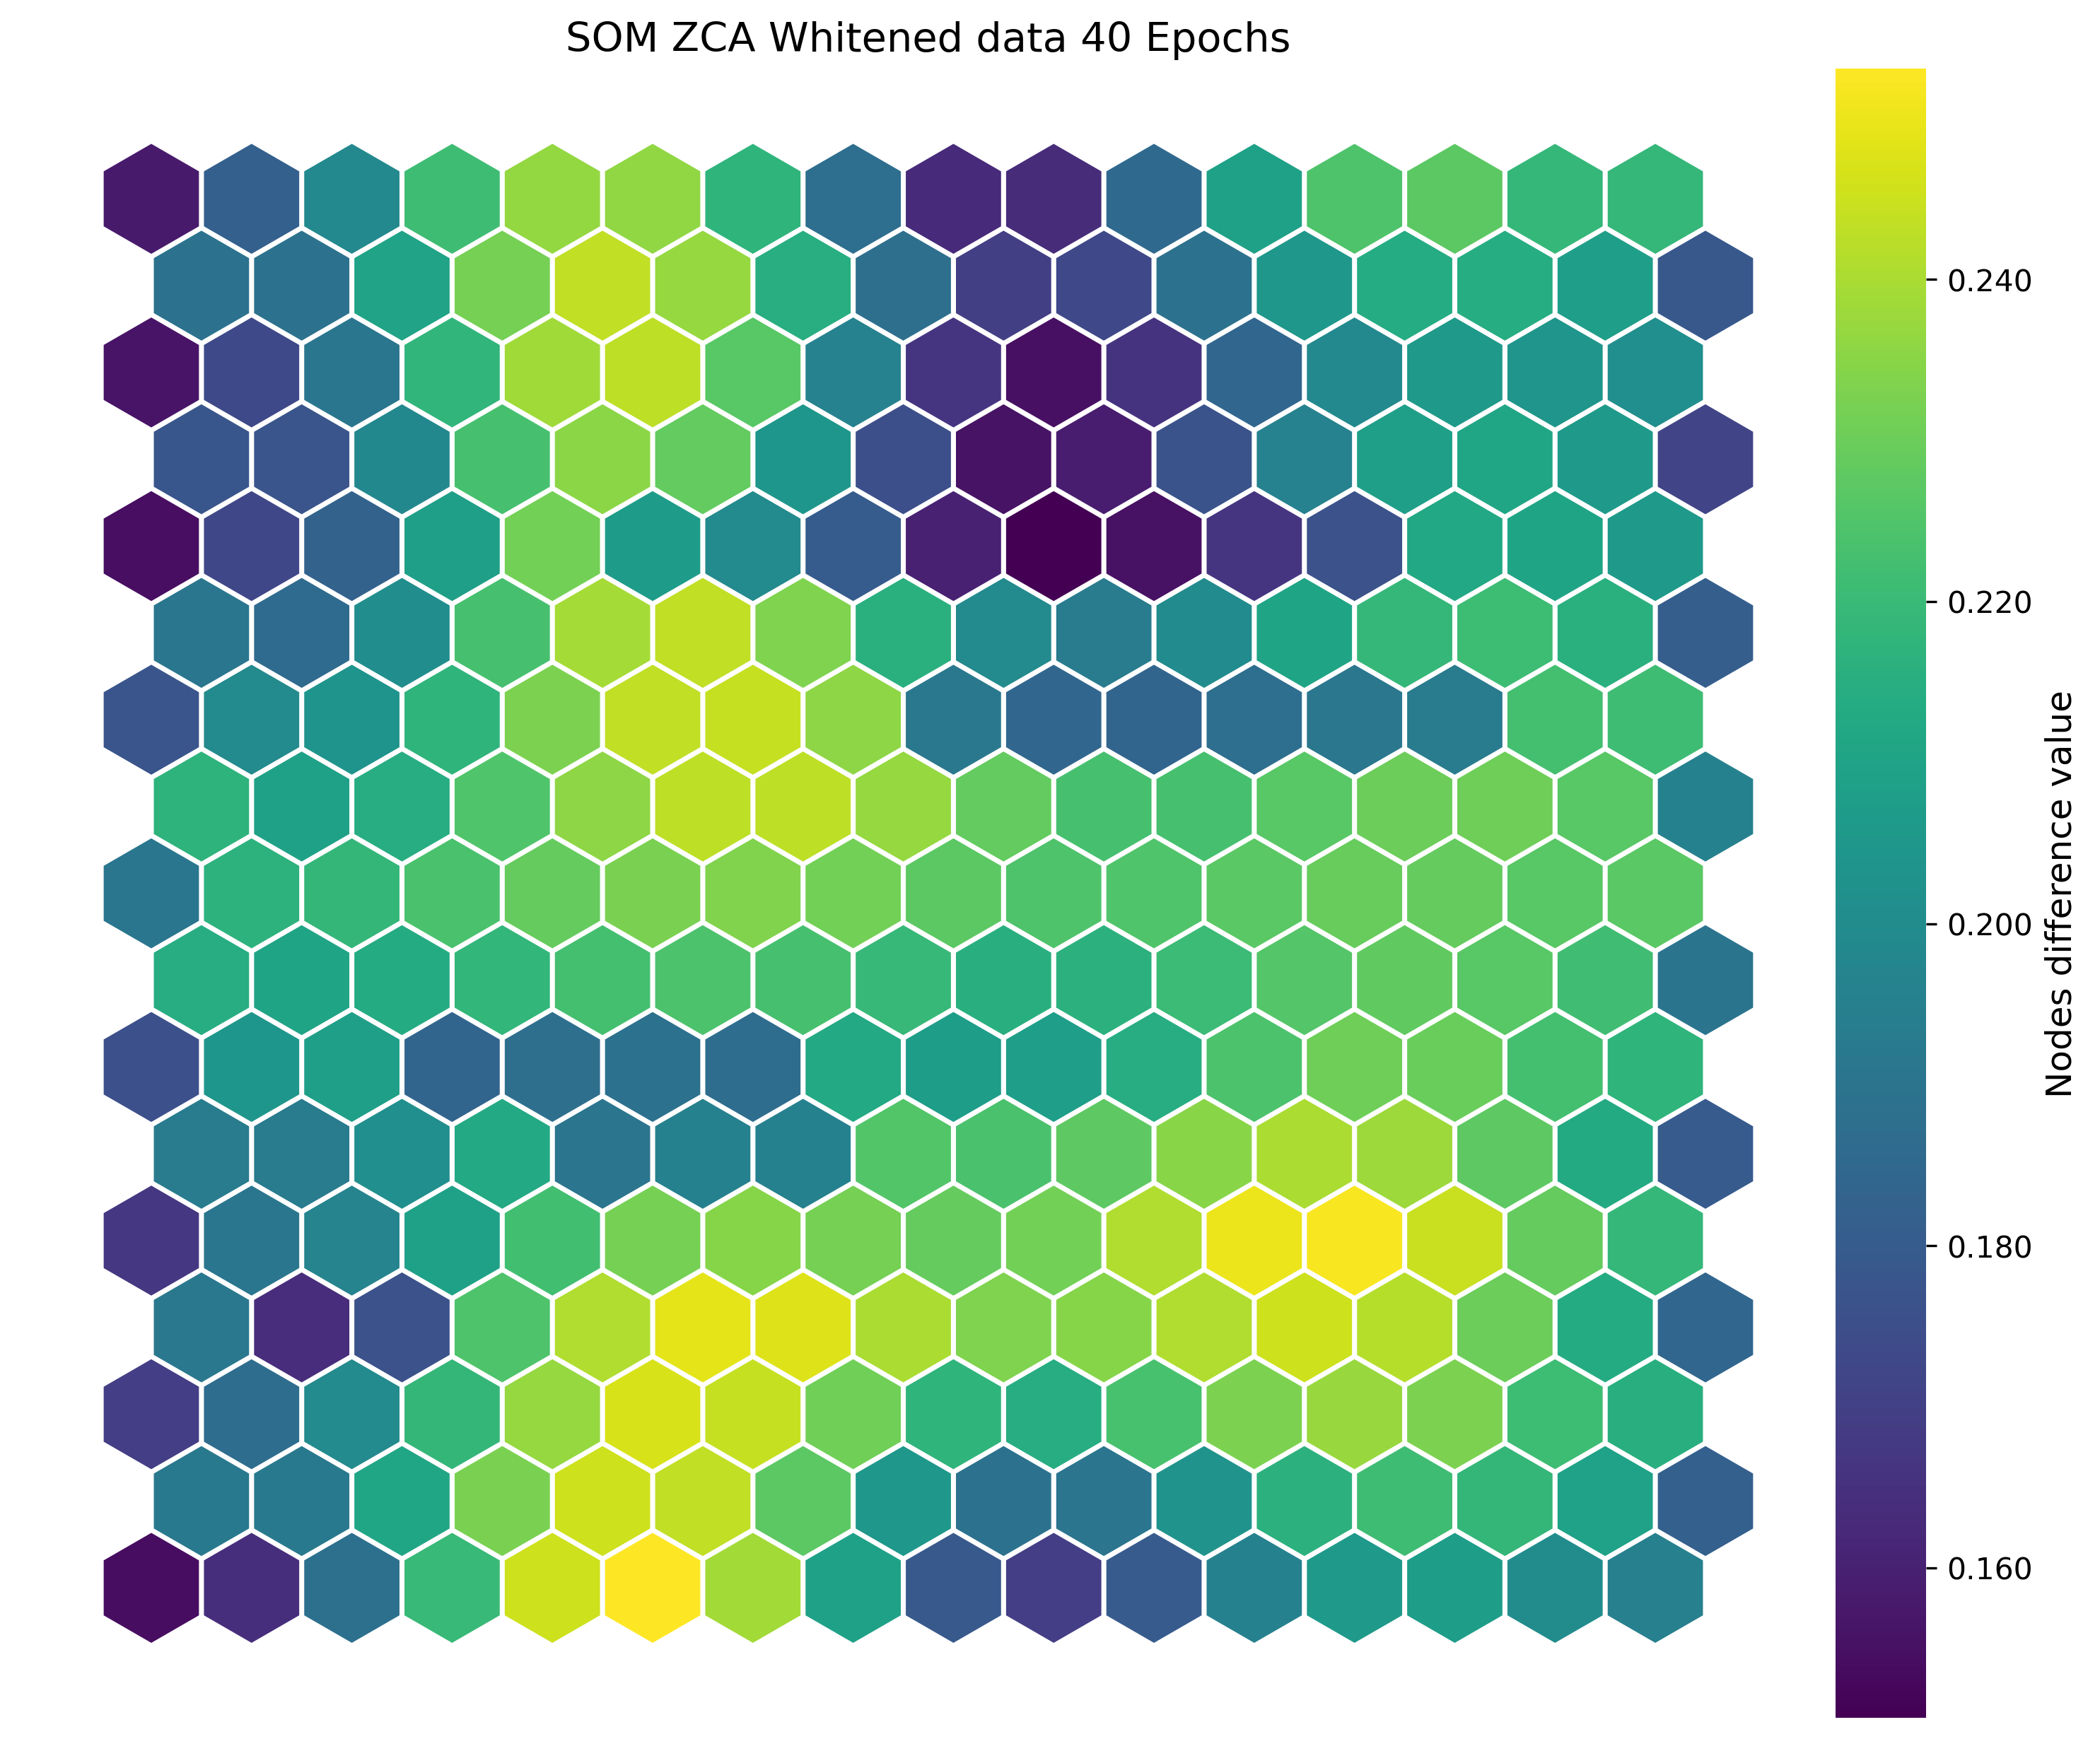

In [25]:
sommap = sps.SOMNet(
    17,
    16,
    data_white_without_id,
    load_file = file_trained_som,
    debug= False,
    metric = 'euclidean',
    topology= 'hexagonal'
    )

sommap.plot_map_by_difference(show=True, print_out=False, title='SOM ZCA Whitened data 40 Epochs', figsize=(10,10))

## CIGALE results

Import the parameters from CIGALE

In [18]:
cigale_results_file_path = directory + 'cigale/all_data_6/out6/results.fits'
cigale_results_table = Table.read(cigale_results_file_path)
cigale_results_df = cigale_results_table.to_pandas()

In [19]:
# Lowest chi-square
min_index = cigale_results_df['best.reduced_chi_square'].idxmin()
min_id = cigale_results_df.loc[min_index, 'id']

# Highest chi-square
max_index = cigale_results_df['best.reduced_chi_square'].idxmax()
max_id = cigale_results_df.loc[max_index, 'id']

print("ID with lowest chi-square:", min_id)
print("ID with highest chi-square:", max_id) 

# Compute the median value
median_value = cigale_results_df['best.reduced_chi_square'].median()

# Find the row where chi-square is closest to the median
# (in case there's no exact match)
closest_index = (cigale_results_df['best.reduced_chi_square'] - median_value).abs().idxmin()
median_id = cigale_results_df.loc[closest_index, 'id']

print("ID with chi-square closest to the median:", median_id)

ID with lowest chi-square: b'J010240-312004'
ID with highest chi-square: b'J004953-321718'
ID with chi-square closest to the median: b'J005649-332450'


## Join both tables

In [20]:
allresults_df = pd.merge(data_white, cigale_results_df, on='id', how='outer')

allresults_df.describe()

print(allresults_df.columns.tolist())

['VKG_mag_petro_y_ab_extcorr', 'CAT_w1mpro_ab', 'DESY6_g_r_extcorr', 'DESY6_r_i_extcorr', 'DESY6_i_z_extcorr', 'VKG_y_j_petro_extcorr', 'VKG_j_h_petro_extcorr', 'VKG_h_ks_petro_extcorr', 'CAT_w1_w2_ab', 'DESY6_spread_model_g', 'id', 'bayes.agn.EBV', 'bayes.agn.EBV_err', 'bayes.agn.Mcl', 'bayes.agn.Mcl_err', 'bayes.agn.R', 'bayes.agn.R_err', 'bayes.agn.delta', 'bayes.agn.delta_err', 'bayes.agn.disk_type', 'bayes.agn.disk_type_err', 'bayes.agn.emissivity', 'bayes.agn.emissivity_err', 'bayes.agn.fracAGN', 'bayes.agn.fracAGN_err', 'bayes.agn.i', 'bayes.agn.i_err', 'bayes.agn.law', 'bayes.agn.law_err', 'bayes.agn.oa', 'bayes.agn.oa_err', 'bayes.agn.pl', 'bayes.agn.pl_err', 'bayes.agn.q', 'bayes.agn.q_err', 'bayes.agn.t', 'bayes.agn.t_err', 'bayes.agn.temperature', 'bayes.agn.temperature_err', 'bayes.attenuation.Av_BC', 'bayes.attenuation.Av_BC_err', 'bayes.attenuation.BC_to_ISM_factor', 'bayes.attenuation.BC_to_ISM_factor_err', 'bayes.attenuation.galex.FUV', 'bayes.attenuation.galex.FUV_err

## Plot the results in the trained SOM

/home/polaris/miniconda3/envs/labastro/lib/python3.10/site-packages/simpsom-3.0.0b0-py3.10.egg/simpsom/plots.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{t:.3f}' for t in ticks])


(<Figure size 1500x1500 with 2 Axes>,
 <Axes: title={'center': 'bayes.stellar.age_m_star'}>)

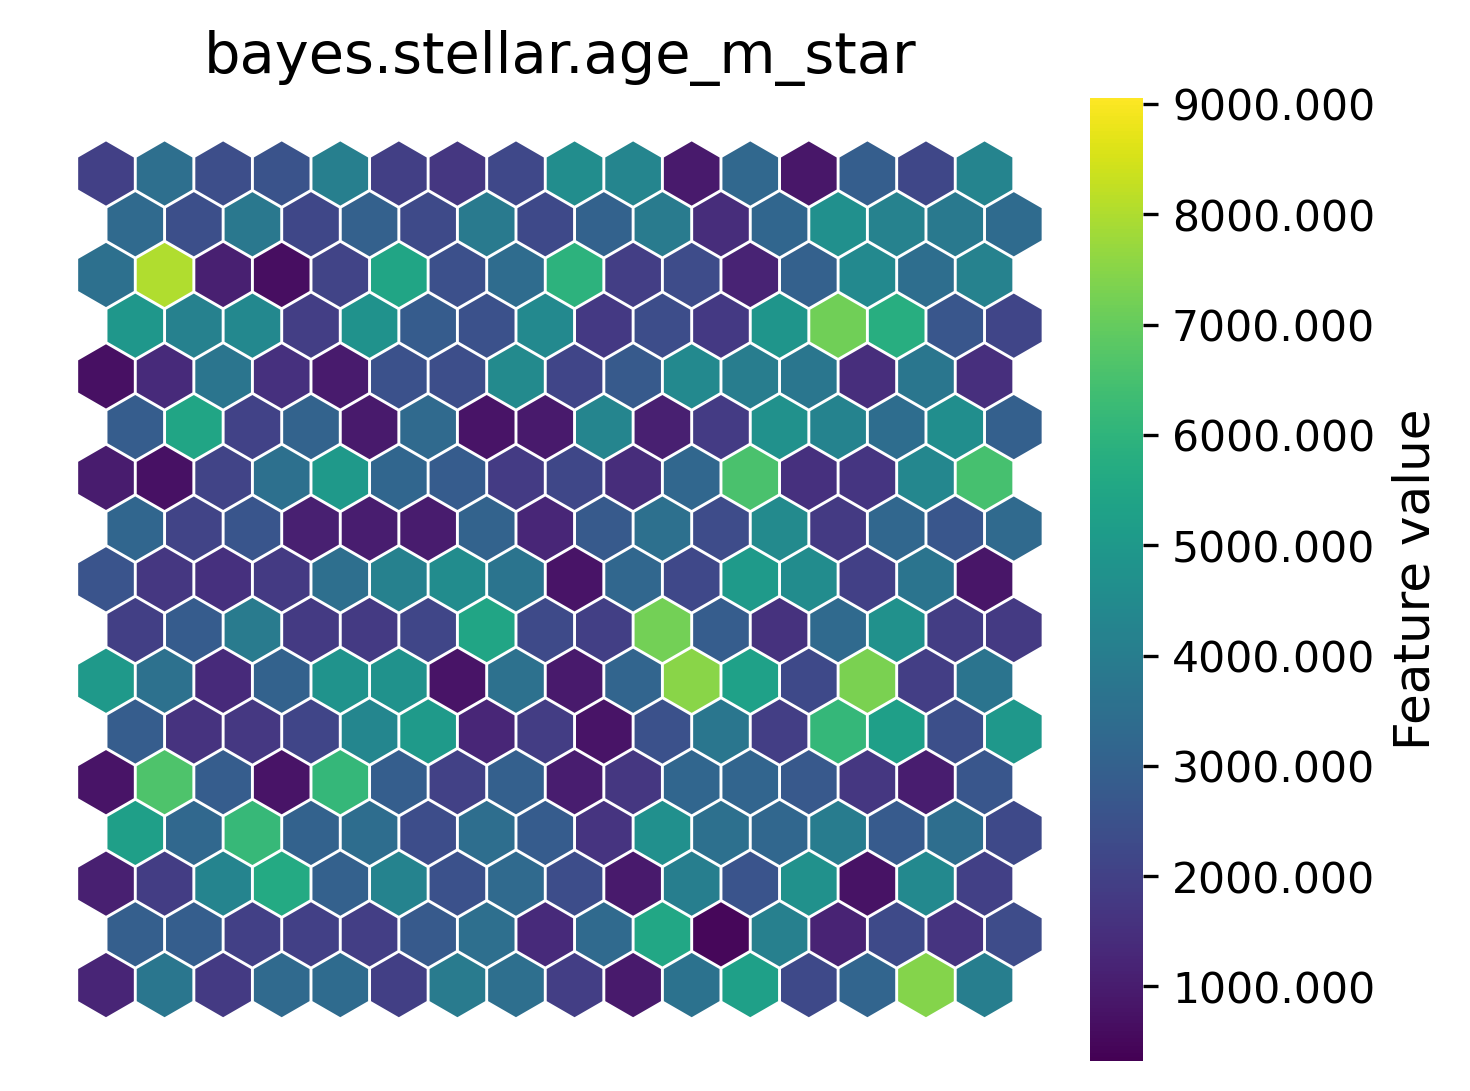

In [24]:
all_positions = [[node.pos[0], node.pos[1]] for node in sommap.nodes_list]
feature = allresults_df['bayes.stellar.age_m_star']

hexagon = sps.polygons.Hexagons

sps.plots.plot_map(
    all_positions,
    feature,
    hexagon,
    title = f'bayes.stellar.age_m_star',
    show = False,
    print_out = True
)